## Neccesary Imports

In [71]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import pre_process_image
import itertools

## Loading the Images

In [19]:
train_dir = os.path.join('data','chest_xray','train')

normal_images = os.listdir( os.path.join(train_dir,'NORMAL') )

len_normal_images = len(normal_images)

print( 'normal images : ' , len_normal_images)

monia_images = os.listdir( os.path.join(train_dir,'PNEUMONIA') )

len_monia_images = len(monia_images)

print( 'monia_images : ' , len_monia_images)

data_dict = { 'Normal' : len(normal_images) , 'Pneumonia' : len(monia_images) }

names = list(data_dict.keys())

values = list(data_dict.values())

normal images :  1341
monia_images :  3875


## Plotting Histogram

Text(0.5, 0.98, 'Categorical Plotting')

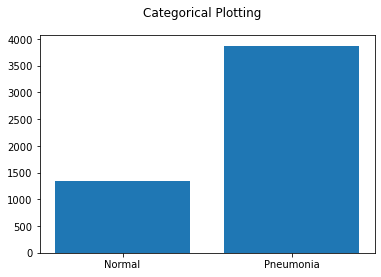

In [20]:
fig, ax = plt.subplots()

ax.bar(names,values)
fig.suptitle('Categorical Plotting')

In [21]:
def plot_images(images,title):

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

    for i, ax in enumerate(axes.flat):
            
            img = pre_process_image(
                os.path.join(train_dir,
                            'PNEUMONIA' if 'person' in images[i] else 'NORMAL',
                             images[i]
                            ),
                normalize=True,
                resize_img=True,
                )
        
            ax.imshow(img, cmap='gray')
            ax.set_title(title)

    fig.tight_layout()    
    plt.show()


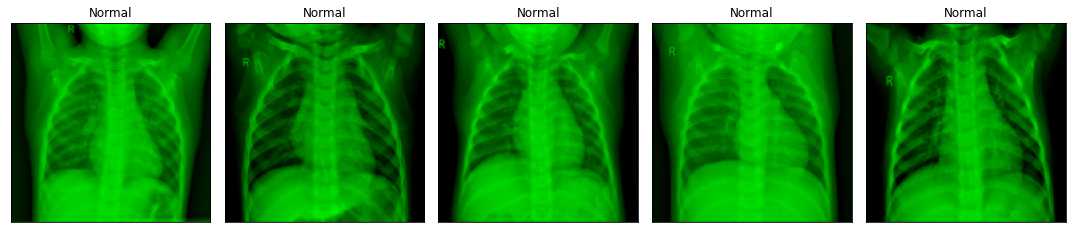

In [22]:
plot_images(normal_images,'Normal')

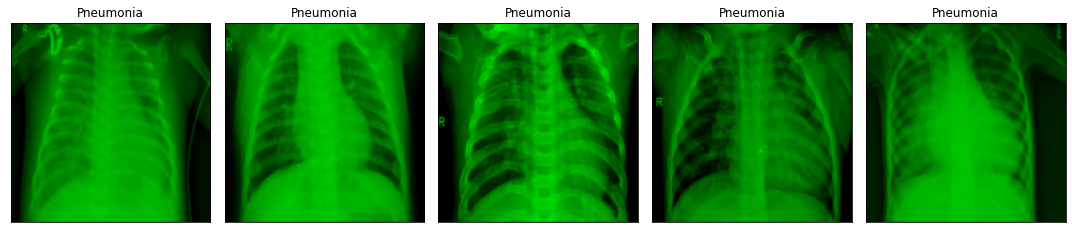

In [23]:
plot_images(monia_images,'Pneumonia')

In [24]:
total = len_normal_images + len_monia_images
total

5216

In [39]:
weight_0 = total / len_normal_images
weight_1 = total / len_monia_images

print(weight_0,weight_1)

3.889634601043997 1.3460645161290323


In [32]:
total_labels =list([])
total_labels.extend([0] * len_normal_images)
total_labels.extend([1] * len_monia_images)
np_total_labels = np.array(total_labels)
np_total_labels.shape

(5216,)

In [34]:
_ , counts = np.unique(np_total_labels,return_counts=True)
counts

array([1341, 3875])

In [36]:
class_weights = [ sum(counts)/c for c in counts]
class_weights

[3.889634601043997, 1.3460645161290323]

In [75]:
sampler = list(map(lambda w,c: ([w]*c) ,class_weights,counts))

In [79]:
np_array = np.array(list(itertools.chain.from_iterable(sampler)))
np_array

array([3.8896346 , 3.8896346 , 3.8896346 , ..., 1.34606452, 1.34606452,
       1.34606452])